In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [50]:
def p_excited(t, Omega, delta, tau):
    Omega_gen = np.sqrt(Omega**2 + delta**2)
    offset = Omega ** 2 / Omega_gen ** 2 / 2
    return offset + (Omega ** 2 / Omega_gen ** 2 * np.sin(Omega_gen * t / 2) ** 2 - offset) * np.exp(-t / tau)

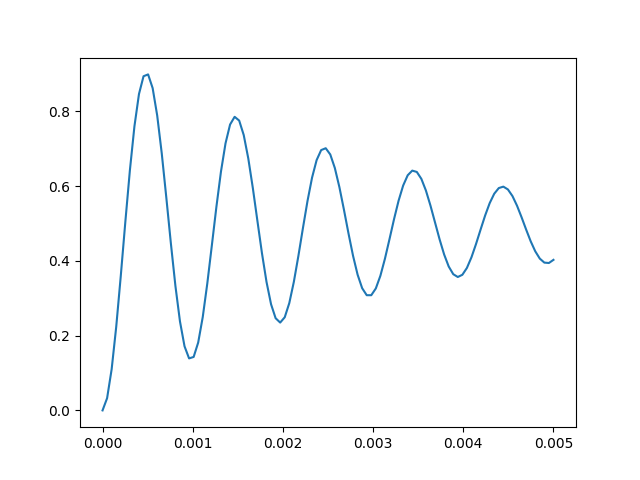

In [54]:
fig, ax = plt.subplots()
Omega = 1e3 * 2 * np.pi
ts = np.linspace(0, 5e-3, 100)
delta = 1e3
tau = 0.003
ax.plot(ts, p_excited(ts, Omega, delta, tau))
plt.show()

In [55]:
def uniform_inhomogenous_broadening(delta, span):
    return np.heaviside(span - delta, 0.5) * np.heaviside(delta + span, 0.5) / (2 * span)

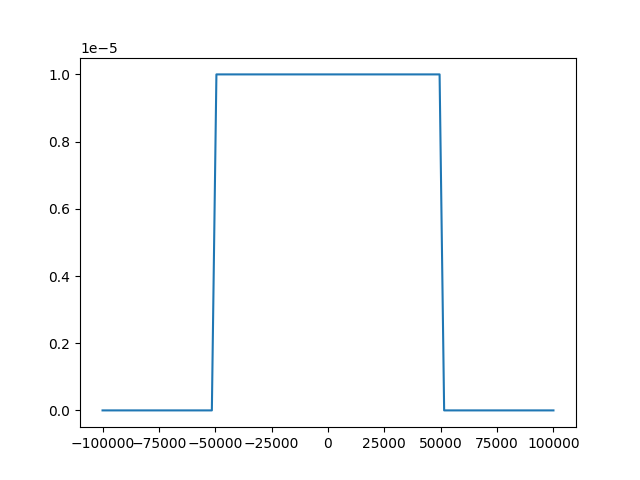

In [56]:
fig, ax = plt.subplots()
span = 50e3
fs = np.linspace(-100e3, 100e3, 100)
ax.plot(fs, uniform_inhomogenous_broadening(fs, span))
plt.show()

In [70]:
span = 0.1e3 * 2 * np.pi
def p_excited_with_inhomogenous(t, Omega, tau):
    def integrand(delta):
        return p_excited(t, Omega, delta, tau) * uniform_inhomogenous_broadening(delta, span)
    return quad(integrand, -span, span)

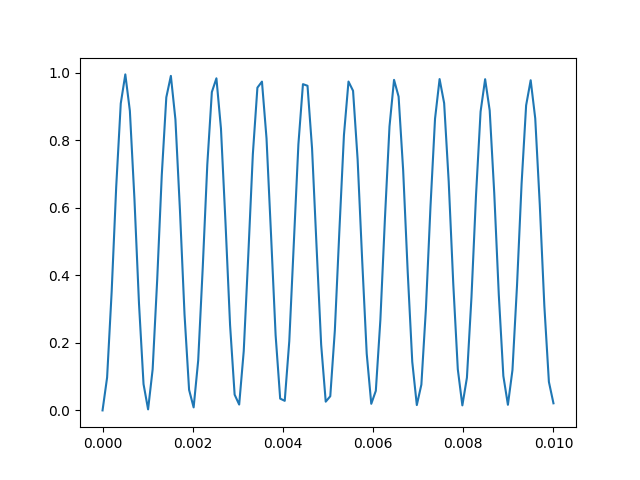

In [72]:
fig, ax = plt.subplots()
Omega = 1e3 * 2 * np.pi
ts = np.linspace(0, 10e-3, 100)
tau = 0.3
ps = [p_excited_with_inhomogenous(t, Omega, tau)[0] for t in ts]
ax.plot(ts, ps)
plt.show()